In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

/Users/adsurbum/anaconda2/envs/py371/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1


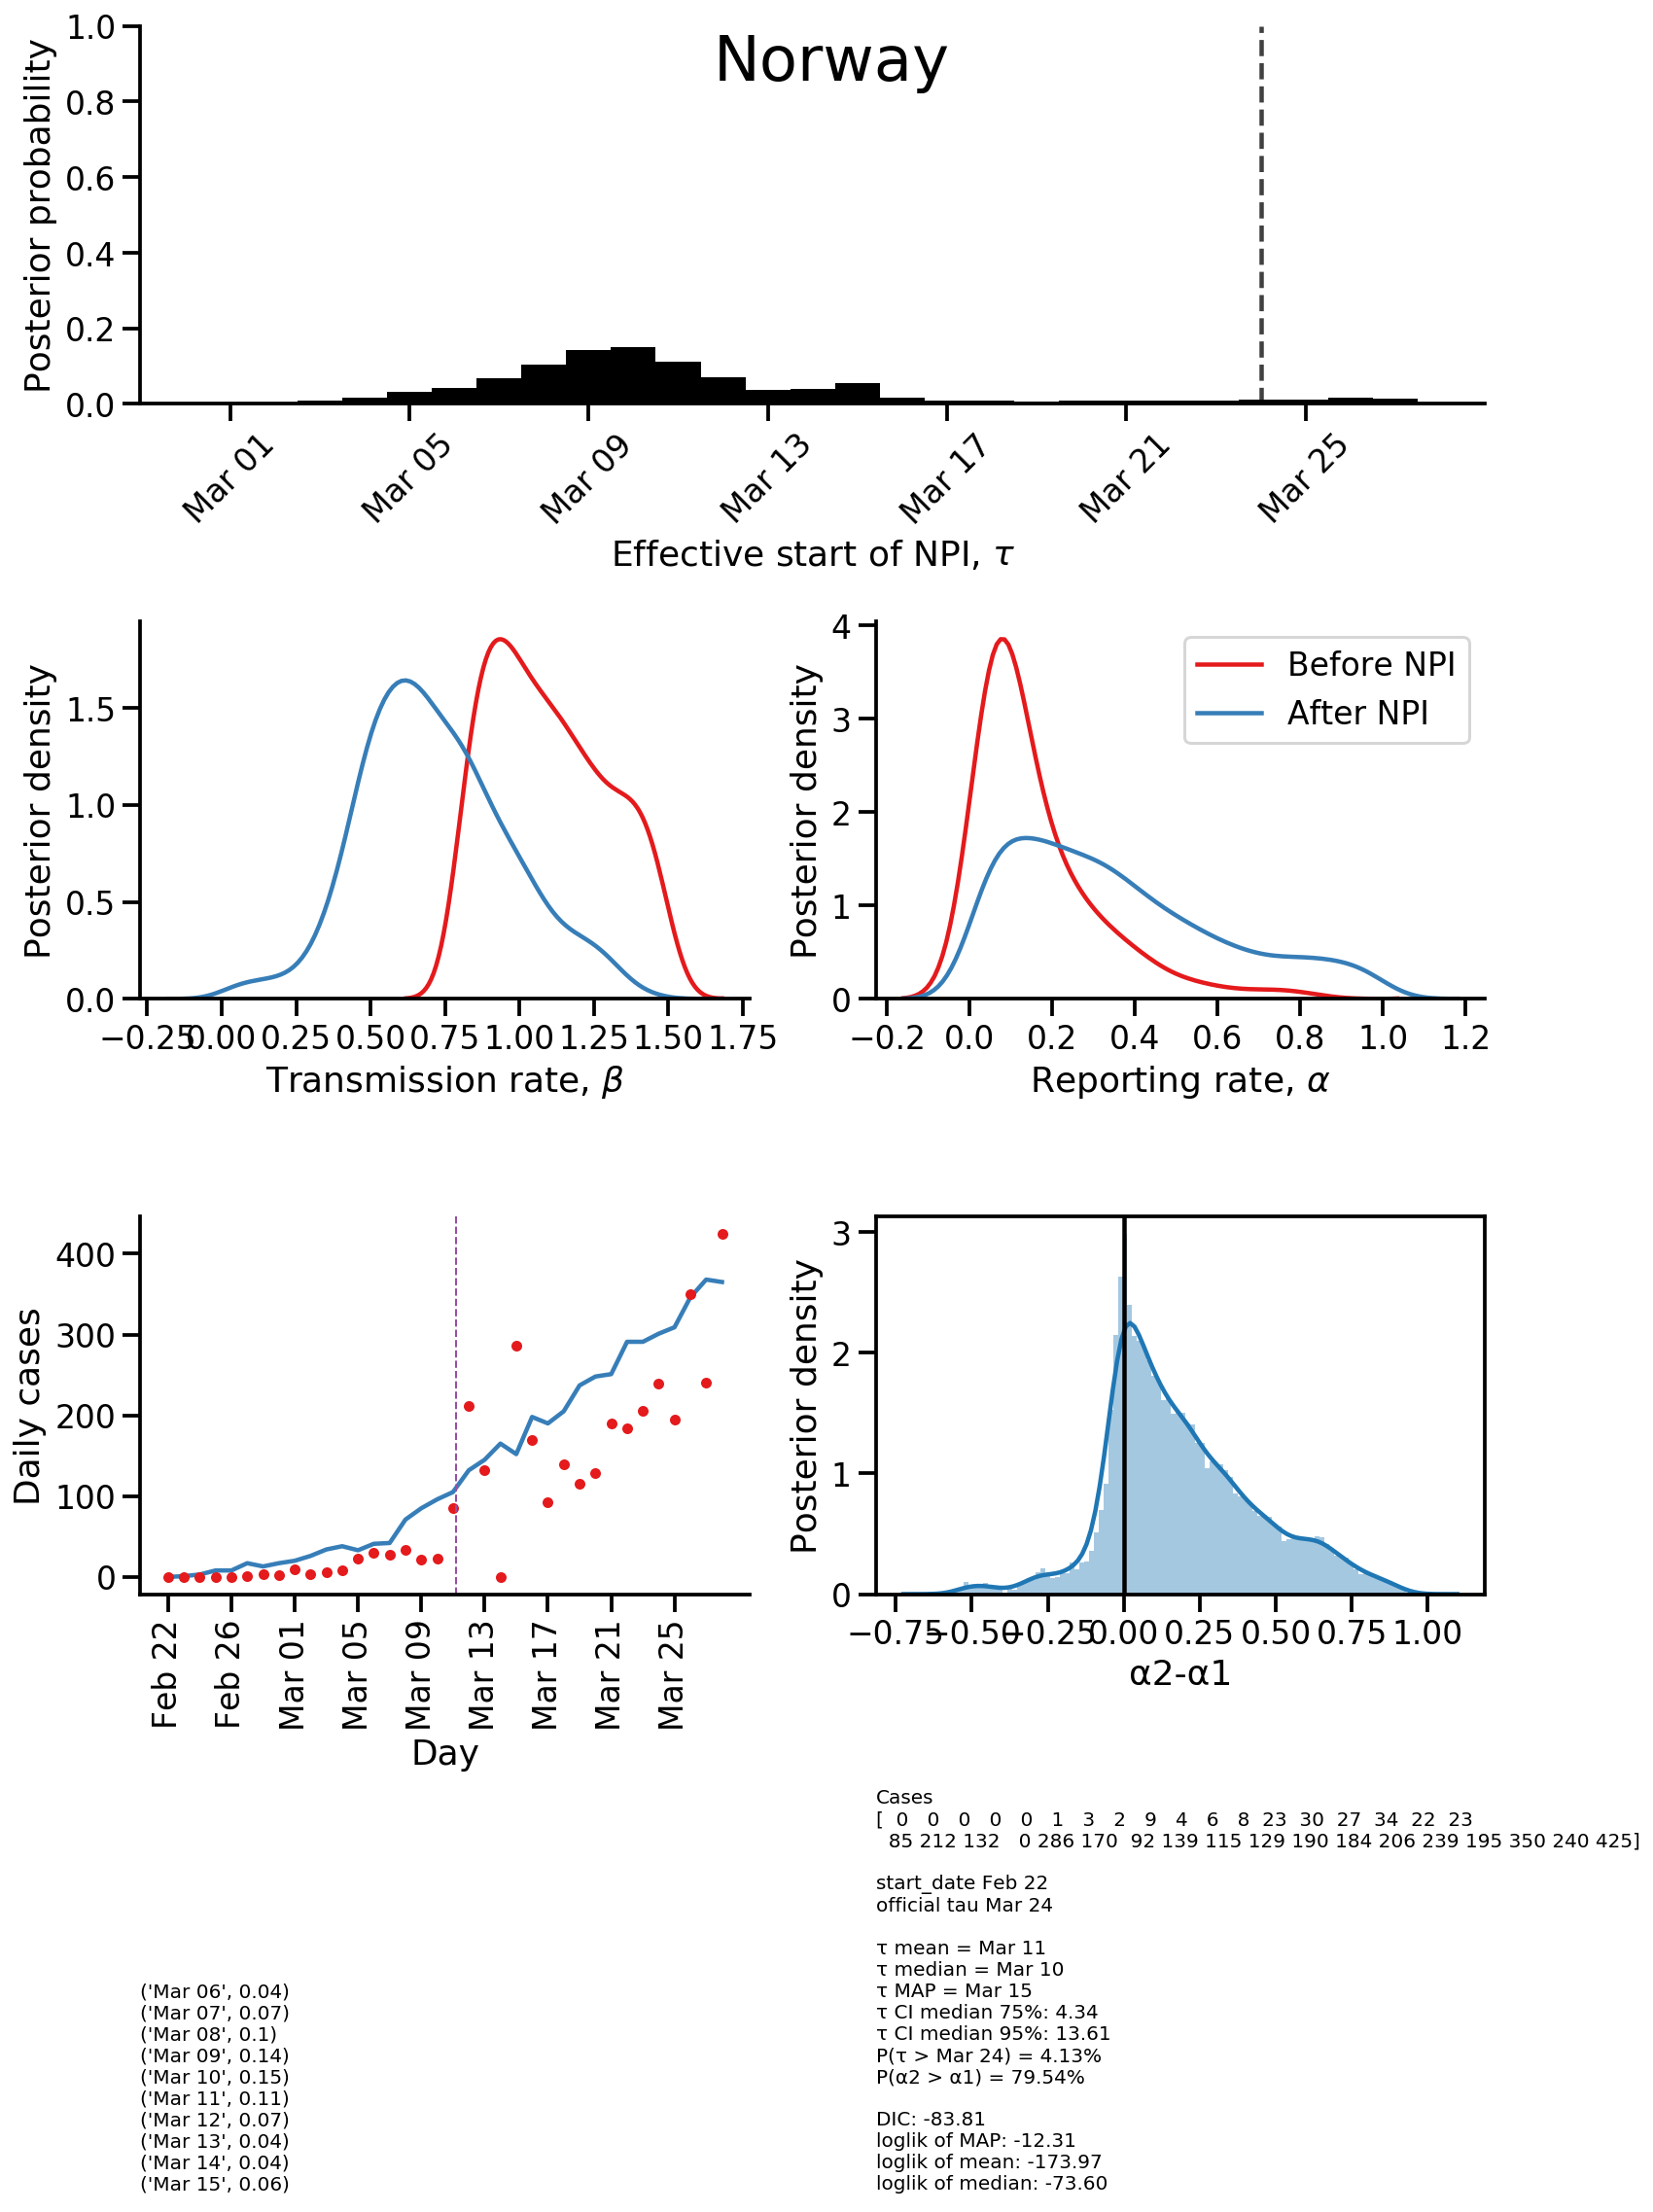

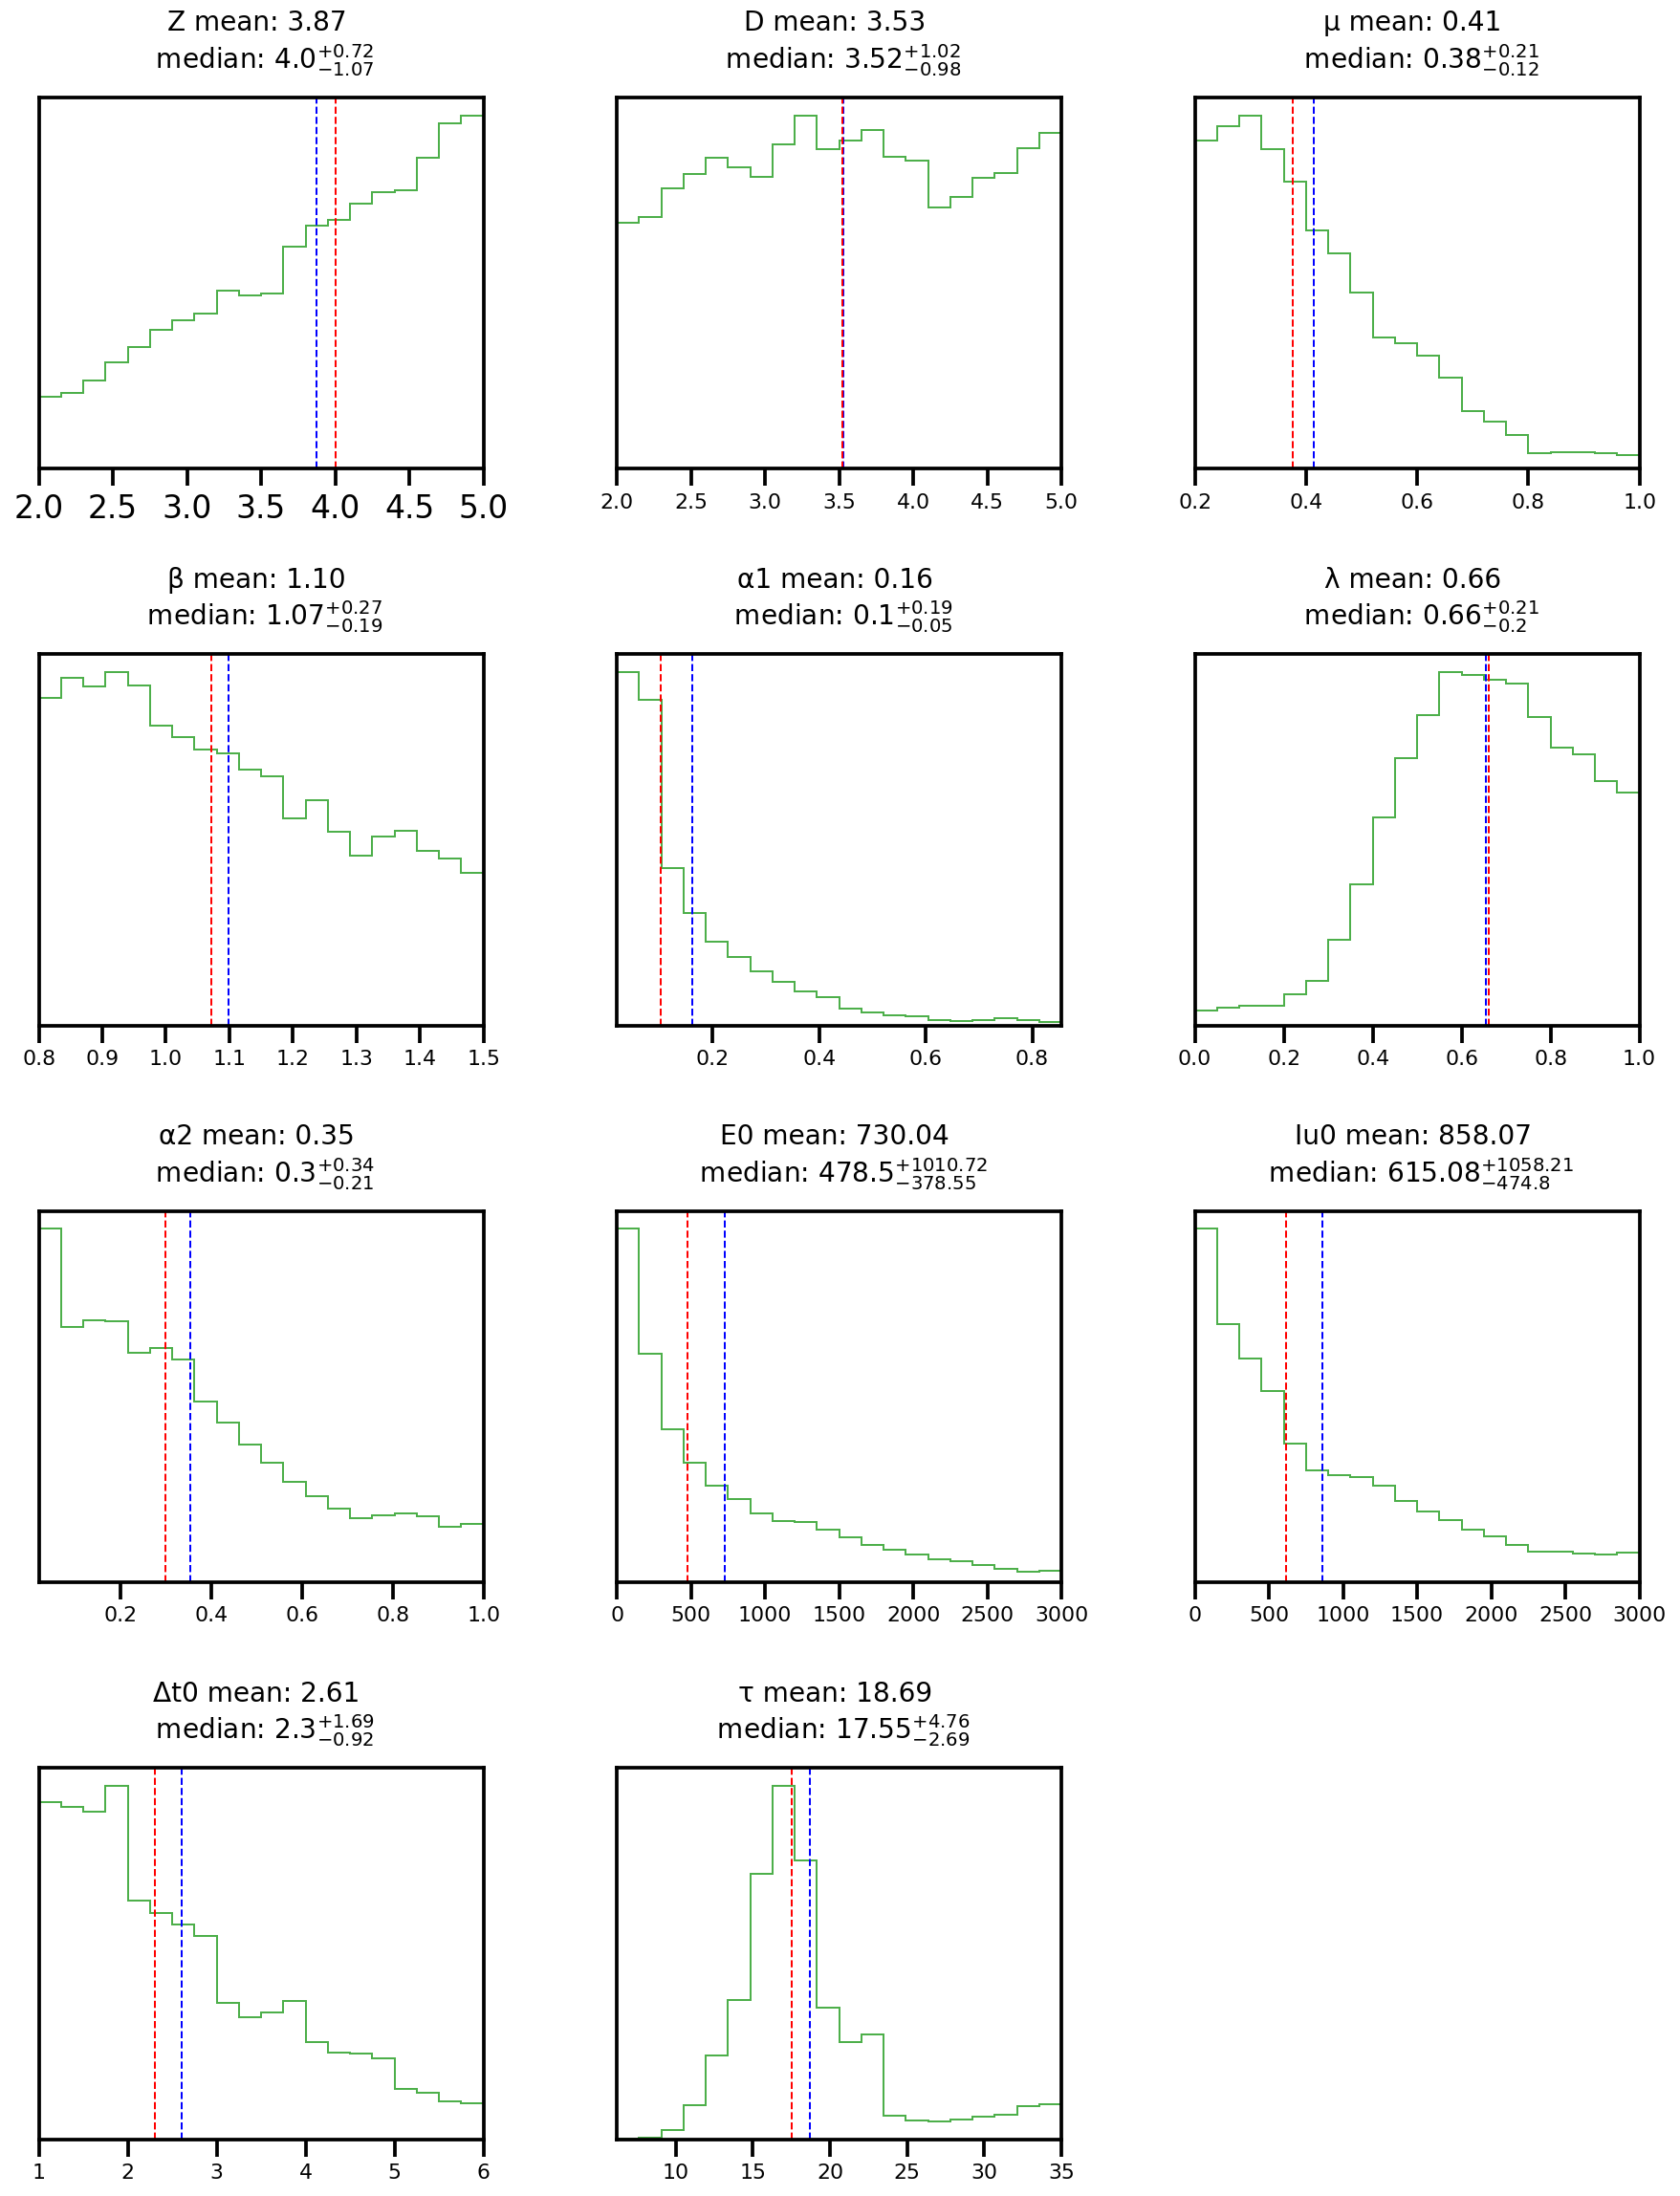

In [13]:
country_name = 'Norway'
file_name = '../output/2020-05-12-fixed-deltat0-new-normal-100k/inference/{}.npz'.format(country_name)
data = load_data(file_name, country_name)
plot_all();
plot_hists();
# plot_corner();